# Normality of Errors

## Explanation:

Definition: The residuals of the model should follow an approximately normal distribution. This assumption is particularly important for the validity of statistical tests (like t-tests for coefficients) and for making accurate confidence intervals.

Why It Matters: If the residuals are not normally distributed, it could mean that the model is missing key variables or that the relationship between the independent and dependent variables is not properly captured by the model. This can lead to biased estimates and incorrect inferences.


## How to Check:
 
- Q-Q Plot (Quantile-Quantile Plot): A Q-Q plot compares the quantiles of the residuals to the quantiles of a normal distribution. If the points roughly follow a straight diagonal line, the residuals are approximately normally distributed.

- Shapiro-Wilk Test: This is a formal statistical test for normality. A significant p-value suggests that the residuals are not normally distributed.

- Histogram of Residuals: You can also simply plot a histogram of the residuals to visually inspect whether they follow a bell-shaped curve.

- Breusch-Pagan Test: This statistical test can also be used to formally detect heteroscedasticity.

## Example:

In a model predicting student test scores, if the residuals are heavily skewed or show kurtosis (peaks or tails much higher or lower than normal), it may indicate that the model is not capturing some important aspect of the data, like a non-linear relationship or the presence of outliers.


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot

# Set a random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic data
n = 100
x = np.random.normal(0, 1, n)  # Independent variable

# Create a dependent variable with normally distributed errors
errors = np.random.normal(0, 1, n)
y = 2 * x + errors  # y has a linear relationship with x plus normal errors

# Step 2: Fit a linear regression model
X = sm.add_constant(x)  # Add intercept
model = sm.OLS(y, X).fit()

# Step 3: Calculate residuals
residuals = model.resid


<Figure size 1000x600 with 0 Axes>

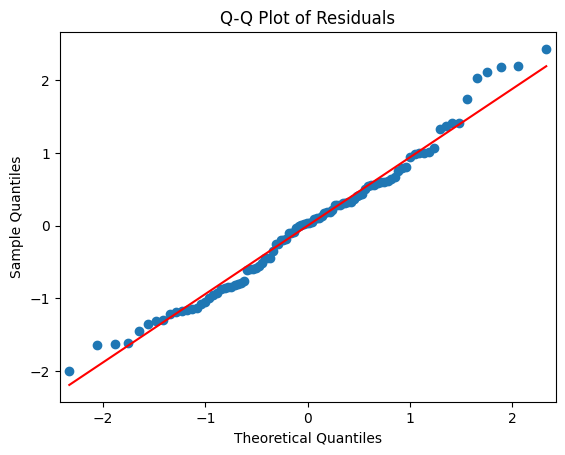

In [6]:
# Step 4: Check normality of errors

# 4a. Q-Q Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

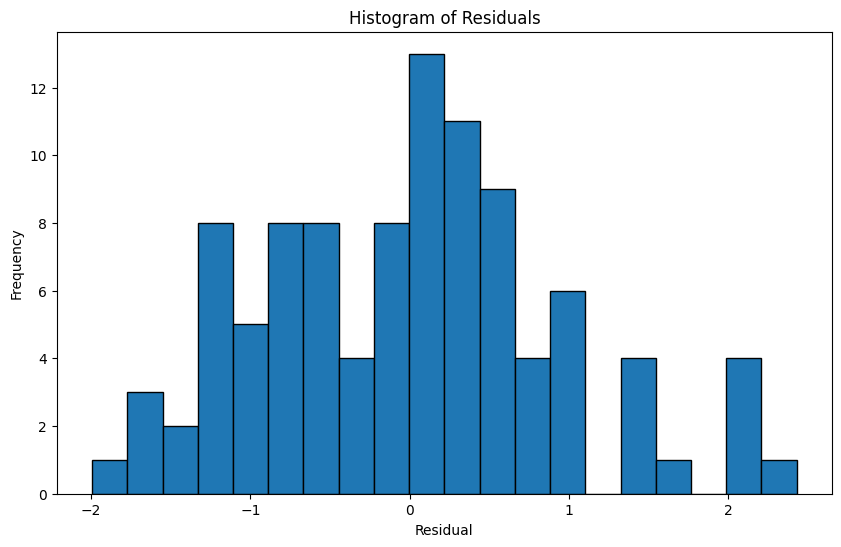

In [7]:

# 4b. Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


In [8]:
# 4c. Shapiro-Wilk Test
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f}")

Shapiro-Wilk Test p-value: 0.1648


Example Output:

Q-Q Plot: If the residuals are normally distributed, the points will lie close to the diagonal line.
Histogram: The histogram should show a symmetric bell curve if the residuals are normal.
Shapiro-Wilk Test: The p-value will indicate whether the residuals deviate from normality. A p-value greater than 0.05 would suggest normality.

Interpretation:

If the residuals are normally distributed, the model likely satisfies this key assumption, and you can proceed with confidence in the validity of statistical tests and inferences.

If the residuals are not normally distributed (e.g., the histogram is skewed, the Q-Q plot shows a systematic deviation, or the Shapiro-Wilk test p-value is low), this could indicate:

Model Misspecification: Perhaps a non-linear relationship needs to be modeled.

Omitted Variables: Important predictors might be missing.
Outliers: Extreme values may be influencing the results.